# Linear Regression on YearPredictionMSD

In this notebook we are going to train a linear regression model on the YearPredictionMSD, a data set that contains features extracted from songs. The model that we will train is going to predict which year a song was from.

## 1. Instantiate MSDF_SGD

## 2. Load and prepare the data

We load the data that is formatted in libsvm format (label feature_index1:feature1 feature_index2:feature2 ...). Then, we perform a normalization on the features of the data set, where we can specify: (1) The normalization range (-1 to 1 or 0 to 1), (2) if the normalization should happen row-wise or column-wise.

In [1]:
from livelossplot import PlotLosses
from time import sleep
from matplotlib import pyplot as plt
from livelossplot.outputs import MatplotlibPlot
from zipml_sgd import ZipML_SGD
import numpy as np
import time
import pandas as pd
import math
Z = ZipML_SGD(on_pynq=0)
start = time.time()
#Z.load_libsvm_data('./YearPredictionMSD/YearPredictionMSD', 50000, 90)
Z.load_libsvm_data('./YearPredictionMSD/YearPredictionMSD', 50000, 90)
print('a loaded, time: ' + str(time.time()-start) )
Z.a_normalize(to_min1_1=1, row_or_column='c');
Z.b_normalize(to_min1_1=0)

a loaded, time: 4.316428184509277


## 3. 全精度计算

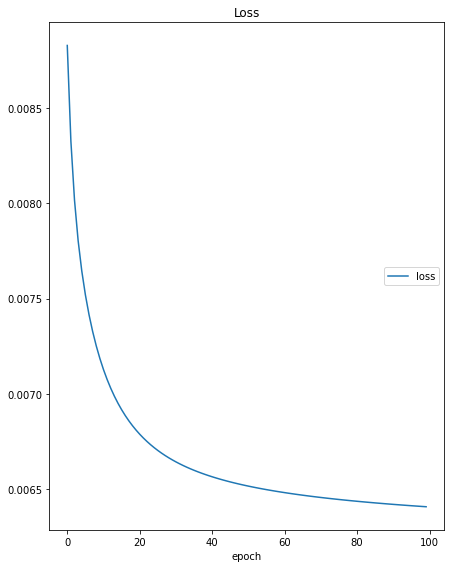

In [2]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << (12))
start = time.time()

# Train on the CPU
x_history = Z.LINREG_SGD(num_epochs=num_epochs, step_size=step_size, step_size_online = step_size, online=0, ka=9, kx=25)
groups = {'loss': ['loss']}

outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)
print('Performed linear regression on cadata. Training time: ' + str(time.time()-start))
# Print losses after each epoch
initial_loss = Z.calculate_LINREG_loss(np.zeros(Z.num_features), 0)
print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_LINREG_loss(x_history[:,e], 0)
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()

# 4.online量化,ka=9,kx从16到32

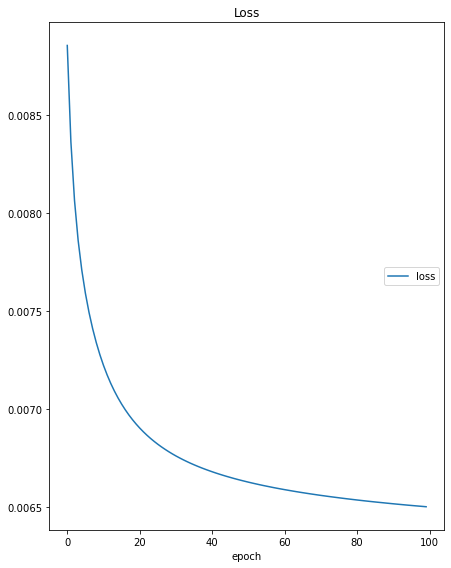

In [3]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << (7))
start = time.time()
ka=9
kx=25
kb=25
# Train on the CPU
x_history = Z.LINREG_SGD(num_epochs=num_epochs, step_size=step_size, step_size_online = step_size, online=1, ka=9, kx=25, kb=25)
groups = {'loss': ['loss']}

outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)
print('Performed linear regression on cadata. Training time: ' + str(time.time()-start))
# Print losses after each epoch
initial_loss = Z.calculate_LINREG_loss(np.zeros(Z.num_features))
print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_LINREG_loss(x_history[:,e])
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()

In [3]:
# Set training related parameters
num_epochs = 100
step_size_online = 1.0/(2**7)
ka=9
kx=25

loss_list = []
for i in range(16,30):#34
    print(i)
    x_history_temp = Z.LINREG_SGD(num_epochs=num_epochs, step_size=step_size_online, step_size_online = step_size_online, online=1, ka=ka, kx=i)
    loss_list_local = []
    for e in range(0, num_epochs):
        loss_temp = Z.calculate_LINREG_loss(x_history_temp[:,e], 0)
        loss_list_local.append(loss_temp)
    loss_list.append(loss_list_local)

16
epoch_index:20 sample_index:0 x:[ 5.61370850e-01  6.94580078e-02 -3.26538086e-03 -9.68627930e-02
  1.27227783e-01  1.94549561e-01  6.95800781e-02  4.22058105e-02
 -2.45666504e-02 -2.68554688e-02 -4.91333008e-02 -1.43737793e-01
  2.27661133e-02 -8.86230469e-02 -1.25823975e-01  1.60217285e-02
 -2.46826172e-01 -1.15509033e-01 -7.77893066e-02 -6.40869141e-04
 -6.21643066e-02 -1.85150146e-01  8.74633789e-02 -1.59515381e-01
 -2.80517578e-01 -1.72210693e-01  2.04467773e-01 -1.63665771e-01
  2.35595703e-02 -2.59399414e-03  2.11700439e-01 -2.43377686e-01
  1.52587891e-04  2.54547119e-01 -3.03680420e-01 -1.37329102e-02
  2.25219727e-02  7.02514648e-02  3.66821289e-02  3.47015381e-01
  5.61523438e-02  1.05590820e-01 -1.74316406e-01 -5.21240234e-02
 -1.62841797e-01 -1.84631348e-02 -2.38922119e-01  2.34985352e-02
  2.73284912e-01 -1.06323242e-01 -3.00140381e-01  1.70593262e-02
  2.04040527e-01  7.48901367e-02  3.14331055e-03 -2.53143311e-01
  9.97619629e-02  3.16802979e-01  2.22381592e-01  2.478

18
epoch_index:20 sample_index:0 x:[ 0.20922852  0.14390564 -0.10217285 -0.06295776  0.02282715  0.00276184
 -0.11626434  0.01554871 -0.03482056 -0.04831696  0.03778076 -0.03748322
  0.01003265 -0.00204468 -0.01847076  0.02604675 -0.02539062 -0.02249908
  0.0351944   0.0374527   0.02915955 -0.05886841  0.06651306  0.00704193
 -0.11026001  0.04460907 -0.02335358  0.07772064  0.00675201  0.0863266
 -0.03058624  0.02771759 -0.0032959  -0.05841064 -0.08052826 -0.01061249
  0.03601837 -0.08782959  0.02626038  0.12208557  0.02259827  0.05908203
  0.03464508 -0.12285614  0.05259705 -0.08152008  0.04097748 -0.05059052
 -0.01607513  0.02004242 -0.01080322  0.05193329  0.05123138  0.07119751
  0.09152985  0.01000977 -0.03487396 -0.07210541  0.00476837  0.02345276
 -0.02404785 -0.07051849 -0.01077271  0.05645752 -0.05775452  0.01921844
 -0.06770325  0.02291107 -0.02642822  0.03769684 -0.00719452  0.04701233
  0.01473236  0.05912018  0.08242035 -0.04299927 -0.08726501 -0.05173492
 -0.01063538  0.0

20
epoch_index:20 sample_index:0 x:[ 0.18940163  0.1376915  -0.105793   -0.09056664 -0.01177216  0.00977898
 -0.09854126 -0.00326347 -0.03974342 -0.03346252  0.04205322 -0.01864052
  0.00345802 -0.00424767 -0.01067352  0.02492332 -0.01392937 -0.01996613
  0.03856468  0.05194855  0.03557968 -0.03863907  0.06926346  0.01953888
 -0.08848     0.04335403 -0.02103615  0.06333351  0.01684189 -0.01087952
 -0.03888321  0.02460861  0.00466156 -0.05566978 -0.06894112 -0.02354622
 -0.00258446 -0.07685661  0.04892921  0.10847855 -0.02921867  0.05298233
  0.02568436 -0.00582314  0.03514671  0.00653076  0.04270554  0.03552628
 -0.0052948   0.01234627  0.01560593 -0.0114975   0.00534821  0.06616211
 -0.01978683  0.01858521 -0.02046776 -0.05732536  0.00989532 -0.03821945
 -0.01386261 -0.04961586 -0.04183006 -0.00754547  0.01467133  0.01578712
 -0.05684853 -0.01750946 -0.02635574 -0.02997208  0.01410866  0.03499985
 -0.01894379  0.04865837  0.02153015  0.02672958 -0.07597733 -0.04520607
 -0.01461792  0.

22
epoch_index:20 sample_index:0 x:[ 0.18994808  0.13686466 -0.1050334  -0.09060001 -0.01201487  0.00973558
 -0.09793425 -0.00361919 -0.04079533 -0.03303003  0.04204416 -0.01779318
  0.00293112 -0.00410175 -0.01070166  0.02549314 -0.0144496  -0.02019978
  0.03843546  0.0525713   0.0356493  -0.03826237  0.06940603  0.0192399
 -0.08891296  0.04366493 -0.02078438  0.06315041  0.01705647 -0.01131439
 -0.03925037  0.02327681  0.00448895 -0.05633879 -0.06876278 -0.02429581
 -0.00387001 -0.07666445  0.0491786   0.1082201  -0.02966499  0.05253744
  0.02592278 -0.00478029  0.03504705  0.00713015  0.04338884  0.03605175
 -0.00580263  0.01160049  0.01551962 -0.01239252  0.00356483  0.06593657
 -0.0207963   0.01834393 -0.01960039 -0.05714369  0.01019192 -0.03909397
 -0.0141716  -0.04933023 -0.04184723 -0.0081234   0.01535702  0.01444674
 -0.05679035 -0.01710987 -0.02629566 -0.03032923  0.01392794  0.03470135
 -0.01919985  0.04850006  0.02042055  0.02732944 -0.07617903 -0.04480457
 -0.01422834  0.0

24
epoch_index:20 sample_index:0 x:[ 0.18997967  0.13695693 -0.10514235 -0.09064806 -0.01200187  0.00972974
 -0.0980221  -0.00364375 -0.04068685 -0.03305078  0.04206526 -0.01776528
  0.00286698 -0.00411415 -0.01060498  0.0254699  -0.01437378 -0.02022219
  0.03841138  0.0524863   0.03565717 -0.0382266   0.06937504  0.01921785
 -0.08876526  0.04366648 -0.02073967  0.06303298  0.01696622 -0.01118982
 -0.03922093  0.02322912  0.00444782 -0.05630744 -0.06879008 -0.02426422
 -0.00372279 -0.07666767  0.04910016  0.10830581 -0.02969265  0.05272651
  0.02582693 -0.00489831  0.0350095   0.00709343  0.04332256  0.03584778
 -0.00594556  0.01167321  0.01547253 -0.01248693  0.00347459  0.06598032
 -0.02073812  0.01839542 -0.01974189 -0.05701959  0.01039958 -0.03902698
 -0.01402187 -0.04946101 -0.04182613 -0.0081296   0.01534522  0.01448548
 -0.05681872 -0.01709318 -0.02638257 -0.03043473  0.01379526  0.03470838
 -0.01909852  0.048558    0.02047694  0.02726638 -0.07626212 -0.04492021
 -0.01416576  0.

26
epoch_index:20 sample_index:0 x:[ 0.18994516  0.13696191 -0.10515097 -0.09063989 -0.01203519  0.00969595
 -0.09802625 -0.00363836 -0.040694   -0.03306592  0.04207239 -0.01774412
  0.00286099 -0.00408825 -0.01058048  0.02545792 -0.01434669 -0.02019188
  0.03842786  0.05250472  0.03567222 -0.03822106  0.06937045  0.01923096
 -0.08876666  0.04366249 -0.02075535  0.06306595  0.01699269 -0.01122764
 -0.03920084  0.02325454  0.00443822 -0.05632764 -0.06880087 -0.02427721
 -0.00373212 -0.07668567  0.04909712  0.10827035 -0.02970207  0.05271029
  0.02584803 -0.00487     0.03503492  0.00712964  0.04335064  0.0358797
 -0.00594476  0.01167753  0.01547837 -0.01248437  0.0034883   0.06598896
 -0.02077836  0.01841247 -0.01974261 -0.05703494  0.0104039  -0.03905356
 -0.01403272 -0.04944652 -0.04183334 -0.00812435  0.01537287  0.01451024
 -0.0568119  -0.01710552 -0.02638561 -0.03044632  0.01382345  0.03470948
 -0.01911125  0.04856783  0.0204514   0.02728912 -0.07627711 -0.04491928
 -0.01418015  0.0

28
epoch_index:20 sample_index:0 x:[ 0.1899475   0.13695879 -0.10514775 -0.09063603 -0.01202847  0.00969928
 -0.09802223 -0.00364228 -0.04069141 -0.03306761  0.04207132 -0.01774977
  0.00285871 -0.00409151 -0.01058527  0.02545944 -0.01434638 -0.02019604
  0.03842419  0.05250704  0.03567293 -0.0382252   0.0693678   0.01923279
 -0.08877031  0.04365974 -0.02075627  0.06306478  0.01698823 -0.01123056
 -0.03920015  0.02325244  0.00443799 -0.05632169 -0.06880195 -0.02427799
 -0.00373401 -0.0766857   0.04909768  0.10827575 -0.02970558  0.0527102
  0.0258453  -0.0048689   0.03503591  0.00712957  0.04335095  0.0358796
 -0.00594326  0.01168419  0.0154789  -0.01248447  0.00348619  0.06599179
 -0.02077446  0.01841019 -0.01974045 -0.05703318  0.01040258 -0.03905578
 -0.01402945 -0.04944123 -0.04183143 -0.00812275  0.01536927  0.01450644
 -0.05680847 -0.01711257 -0.02638936 -0.03044732  0.01381983  0.03470507
 -0.01910552  0.04856464  0.02045139  0.02728454 -0.07627039 -0.04491443
 -0.01417972  0.04

# loss可视化

<AxesSubplot:>

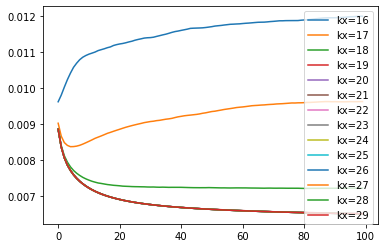

In [4]:
loss_array = np.array(loss_list)
trans = np.swapaxes(loss_array, 1, 0)
data_df = pd.DataFrame(trans,columns=['kx=16', 'kx=17', 'kx=18', 'kx=19','kx=20', 'kx=21', 'kx=22', 'kx=23','kx=24', 'kx=25', 'kx=26', 'kx=27','kx=28', 'kx=29'])
#print(data_df)

data_df.plot()

# 5.online量化,ka=13,kx从16到32

In [5]:
# Set training related parameters
num_epochs = 100
step_size_online = 1.0/(2**7)
ka=13
kx=25

loss_list = []
for i in range(16,30):#34
    print(i)
    x_history_temp = Z.LINREG_SGD(num_epochs=num_epochs, step_size=step_size_online, step_size_online = step_size_online, online=1, ka=ka, kx=i)
    loss_list_local = []
    for e in range(0, num_epochs):
        loss_temp = Z.calculate_LINREG_loss(x_history_temp[:,e], 0)
        loss_list_local.append(loss_temp)
    loss_list.append(loss_list_local)

16
epoch_index:20 sample_index:0 x:[ 0.57946777  0.06546021  0.00344849 -0.11813354  0.1305542   0.22457886
  0.10012817  0.05487061 -0.03833008 -0.01940918 -0.04962158 -0.14147949
  0.01095581 -0.1187439  -0.16921997  0.01034546 -0.30218506 -0.13897705
 -0.08236694 -0.01742554 -0.07089233 -0.22695923  0.09036255 -0.19036865
 -0.33291626 -0.19580078  0.22293091 -0.17346191  0.03430176  0.00918579
  0.27319336 -0.25701904 -0.00793457  0.30935669 -0.31768799 -0.01123047
  0.02496338  0.10153198  0.04434204  0.38543701  0.06488037  0.06900024
 -0.20483398 -0.10351562 -0.18603516 -0.00994873 -0.24865723  0.03118896
  0.35266113 -0.10931396 -0.29110718  0.02661133  0.19763184  0.06668091
  0.0135498  -0.36834717  0.10998535  0.42080688  0.37304688  0.03805542
  0.19403076 -0.16571045 -0.01937866 -0.02157593 -0.14315796 -0.03070068
 -0.13552856  0.03036499  0.05026245  0.07260132 -0.15716553  0.12814331
  0.01107788  0.11611938  0.12667847 -0.09735107  0.33279419  0.12362671
  0.00390625  0.

18
epoch_index:20 sample_index:0 x:[ 0.20766449  0.14496613 -0.10571289 -0.06627655  0.02659607 -0.00193787
 -0.13089752  0.00760651 -0.03684998 -0.05714417  0.04660034 -0.03253937
  0.01079559  0.00344086 -0.01662445  0.03981018 -0.0248642  -0.01329041
  0.03704071  0.03942871  0.03557587 -0.05136871  0.06682587  0.01670837
 -0.10971069  0.04810333 -0.03394318  0.076828   -0.00306702  0.08506012
 -0.03288269  0.04022217  0.00041199 -0.06897736 -0.07696533 -0.01551819
  0.02768707 -0.06930542  0.02318573  0.11927032  0.02700043  0.04096222
  0.02941895 -0.13882446  0.04960632 -0.08532715  0.05981445 -0.05344391
 -0.02125549  0.01456451 -0.00511169  0.06667328  0.03884888  0.09063721
  0.09643555 -0.00037384 -0.04953003 -0.08220673 -0.02222443  0.02333832
 -0.02360535 -0.0671463   0.00158691  0.05974579 -0.05475616  0.01870728
 -0.07275391  0.0225296  -0.04873657  0.03443909 -0.00714111  0.05189514
  0.02070618  0.06165314  0.08892059 -0.04615021 -0.11125946 -0.06245422
 -0.01129913  0.

20
epoch_index:20 sample_index:0 x:[ 0.18917465  0.14160728 -0.11166191 -0.09220695 -0.00997162  0.00817871
 -0.10655785 -0.00649071 -0.04171181 -0.03913307  0.04606628 -0.01674461
  0.00648499 -0.00312424 -0.00863266  0.03550911 -0.01456451 -0.01591492
  0.04191208  0.0541954   0.03905487 -0.03504944  0.07133102  0.02545738
 -0.09085464  0.04608345 -0.02447319  0.06285095  0.01187325 -0.01409149
 -0.03693962  0.02907944  0.00328255 -0.05688858 -0.0648365  -0.02332115
 -0.00738907 -0.06285286  0.04784584  0.10336494 -0.02839088  0.03134918
  0.02529144 -0.01817894  0.03384018  0.00749588  0.05531502  0.04380417
 -0.00413322  0.00958252  0.01903915 -0.00325203 -0.00365257  0.07932091
 -0.02820206  0.00468445 -0.03170204 -0.05982399 -0.00471306 -0.03951454
 -0.00743866 -0.0483036  -0.03508759  0.00097275  0.01916885  0.01612854
 -0.06027603 -0.01840591 -0.0461998  -0.0312748   0.02065659  0.03655815
 -0.01244736  0.0576725   0.02441788  0.02370453 -0.08444023 -0.05307198
 -0.01801109  0.

22
epoch_index:20 sample_index:0 x:[ 1.88363075e-01  1.42262459e-01 -1.11943722e-01 -9.23595428e-02
 -1.13439560e-02  8.00275803e-03 -1.06185913e-01 -6.18934631e-03
 -4.19640541e-02 -3.77669334e-02  4.54792976e-02 -1.51667595e-02
  5.38587570e-03 -3.84235382e-03 -8.38470459e-03  3.48181725e-02
 -1.36733055e-02 -1.57060623e-02  4.15120125e-02  5.50241470e-02
  3.86786461e-02 -3.52125168e-02  7.14273453e-02  2.52871513e-02
 -8.99934769e-02  4.66685295e-02 -2.39496231e-02  6.10880852e-02
  1.64303780e-02 -1.39937401e-02 -3.73988152e-02  2.86169052e-02
  4.89807129e-03 -5.71446419e-02 -6.37950897e-02 -2.25534439e-02
 -7.92026520e-03 -6.30760193e-02  5.42931557e-02  1.02249146e-01
 -2.90436745e-02  3.11417580e-02  2.39601135e-02 -1.78012848e-02
  3.37481499e-02  7.99179077e-03  5.53302765e-02  4.30245399e-02
 -3.53336334e-03  1.00388527e-02  1.96218491e-02 -7.82251358e-03
 -4.07743454e-03  8.02593231e-02 -2.82287598e-02  3.64446640e-03
 -3.16448212e-02 -6.01439476e-02 -4.94146347e-03 -4.085

24
epoch_index:20 sample_index:0 x:[ 0.18839812  0.1423701  -0.1119616  -0.09227717 -0.01128221  0.00816774
 -0.10619879 -0.0064503  -0.04197025 -0.03798294  0.04549265 -0.015378
  0.00542152 -0.00392866 -0.00833619  0.0347687  -0.01369965 -0.01562691
  0.04149044  0.05497599  0.03866911 -0.03512239  0.07140887  0.02526474
 -0.08984923  0.04660058 -0.02391517  0.06125653  0.01642466 -0.01406872
 -0.03733873  0.02850997  0.00501585 -0.05706251 -0.06399977 -0.02277935
 -0.00778627 -0.06300807  0.05429804  0.10238552 -0.02898848  0.03095949
  0.0239681  -0.01747215  0.03354716  0.00805604  0.05543971  0.04334629
 -0.00349367  0.01014674  0.01958287 -0.00788486 -0.00399566  0.08022201
 -0.02832162  0.00385809 -0.03158724 -0.06027818 -0.00487888 -0.0409385
 -0.00798786 -0.04769146 -0.04138064 -0.00026143  0.01922989  0.01546621
 -0.05972493 -0.01939893 -0.04644763 -0.03156507  0.02195644  0.03647435
 -0.01741624  0.05668449  0.02270067  0.02530634 -0.08465874 -0.05295825
 -0.01813257  0.042

26
epoch_index:20 sample_index:0 x:[ 0.18840757  0.14236766 -0.11195436 -0.09228641 -0.01128909  0.00816676
 -0.10616308 -0.00641599 -0.04198357 -0.03795585  0.04550096 -0.01536718
  0.00542229 -0.00392005 -0.00833702  0.03477317 -0.01369569 -0.015614
  0.04147398  0.05496487  0.0386844  -0.03512254  0.07141146  0.02526242
 -0.08982867  0.04658341 -0.02387071  0.06124809  0.01637053 -0.01405588
 -0.03737357  0.02852175  0.00491002 -0.05705956 -0.0639731  -0.02281609
 -0.00780538 -0.06301048  0.05424365  0.1023964  -0.02900755  0.03095049
  0.02398896 -0.01748374  0.03355569  0.00807929  0.05543286  0.04332489
 -0.00349849  0.01016283  0.01957363 -0.00786042 -0.00402442  0.08020771
 -0.02836329  0.00386569 -0.0316385  -0.06028584 -0.00489065 -0.04088396
 -0.00795856 -0.04770756 -0.0413864  -0.00025907  0.01921943  0.01544005
 -0.05969259 -0.01941913 -0.04645407 -0.03158781  0.0219377   0.03647366
 -0.01743016  0.05669317  0.02271181  0.0253455  -0.08466637 -0.05301717
 -0.01807347  0.04

28
epoch_index:20 sample_index:0 x:[ 0.18841363  0.1423694  -0.11195789 -0.0922858  -0.01128945  0.00816861
 -0.10616732 -0.00642031 -0.04198112 -0.03795826  0.04550195 -0.01536833
  0.005422   -0.00391639 -0.00833783  0.03478062 -0.01369787 -0.01562849
  0.04147651  0.05497103  0.0386826  -0.03512257  0.07141133  0.02526304
 -0.08983327  0.04658218 -0.02387124  0.06125341  0.01638199 -0.01405852
 -0.03737307  0.02852383  0.00492005 -0.05705888 -0.06397624 -0.02282356
 -0.00781086 -0.06300729  0.05424716  0.10239146 -0.02900743  0.0309501
  0.02398042 -0.01748261  0.03355744  0.00807491  0.05543932  0.04332847
 -0.00350957  0.01015645  0.01957134 -0.00786355 -0.00402252  0.080201
 -0.02836157  0.00386523 -0.0316406  -0.06028037 -0.00489002 -0.04088366
 -0.00796131 -0.04770821 -0.04138017 -0.00025178  0.01921957  0.01544478
 -0.05969518 -0.01941346 -0.04645217 -0.03158489  0.02194124  0.03647396
 -0.01743069  0.05668606  0.02270898  0.02534697 -0.08465351 -0.05301286
 -0.01807627  0.042

# loss可视化

<AxesSubplot:>

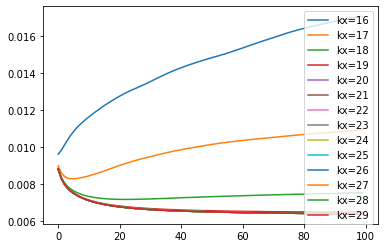

In [6]:
loss_array = np.array(loss_list)
trans = np.swapaxes(loss_array, 1, 0)
data_df = pd.DataFrame(trans,columns=['kx=16', 'kx=17', 'kx=18', 'kx=19','kx=20', 'kx=21', 'kx=22', 'kx=23','kx=24', 'kx=25', 'kx=26', 'kx=27','kx=28', 'kx=29'])
#print(data_df)

data_df.plot()

## 试一试minibatch版本

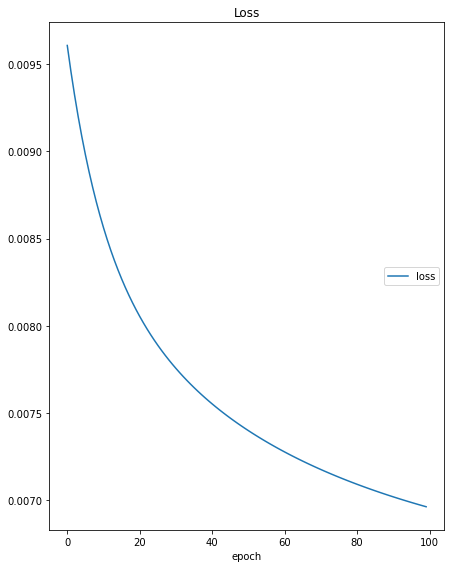

In [5]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << (12))
step_size_online = 1.0/(1 << (7))
start = time.time()
ka=9
kx=25
kb=33
# Train on the CPU
x_history = Z.LINREG_SGD_minibatch(num_epochs=num_epochs, step_size=step_size, step_size_online = step_size_online, online=0, ka=9, kx=25, kb=25)
groups = {'loss': ['loss']}

outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)
print('Performed linear regression on cadata. Training time: ' + str(time.time()-start))
# Print losses after each epoch
initial_loss = Z.calculate_LINREG_loss(np.zeros(Z.num_features))
print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_LINREG_loss(x_history[:,e])
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()

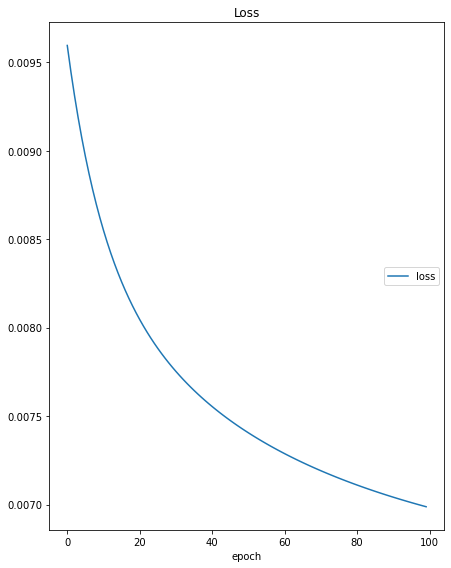

In [2]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << (12))
step_size_online = 1.0/(1 << (7))
start = time.time()
ka=9
kx=25
kb=33
# Train on the CPU
x_history = Z.LINREG_SGD_minibatch(num_epochs=num_epochs, step_size=step_size, step_size_online = step_size_online, online=1, ka=9, kx=25, kb=25)
groups = {'loss': ['loss']}

outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)
print('Performed linear regression on cadata. Training time: ' + str(time.time()-start))
# Print losses after each epoch
initial_loss = Z.calculate_LINREG_loss(np.zeros(Z.num_features))
print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_LINREG_loss(x_history[:,e])
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()

In [2]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << (12))
step_size_online = 1.0/(1 << (7))
start = time.time()
ka=9
kx=25
kb=ka+kx-1
# Train on the CPU
x_history = Z.LINREG_SGD_minibatch(num_epochs=num_epochs, step_size=step_size, step_size_online = step_size_online, online=1, ka=ka, kx=kx, kb=kb)


epoch_index:20 sample_index:0 x:0

epoch_index:20 sample_index:1 x:1

epoch_index:20 sample_index:2 x:2

epoch_index:20 sample_index:3 x:3

epoch_index:20 sample_index:4 x:4

epoch_index:20 sample_index:5 x:5

epoch_index:20 sample_index:6 x:6

epoch_index:20 sample_index:7 x:7

epoch_index:20 sample_index:8 x:8

epoch_index:20 sample_index:9 x:9

epoch_index:20 sample_index:10 x:10

epoch_index:20 sample_index:11 x:11

epoch_index:20 sample_index:12 x:12

epoch_index:20 sample_index:13 x:13

epoch_index:20 sample_index:14 x:14

epoch_index:20 sample_index:15 x:15

epoch_index:20 sample_index:16 x:16

epoch_index:20 sample_index:17 x:17

epoch_index:20 sample_index:18 x:18

epoch_index:20 sample_index:19 x:19

epoch_index:20 sample_index:20 x:20

epoch_index:20 sample_index:21 x:21

epoch_index:20 sample_index:22 x:22

epoch_index:20 sample_index:23 x:23

epoch_index:20 sample_index:24 x:24

epoch_index:20 sample_index:25 x:25

epoch_index:20 sample_index:26 x:26

epoch_index:20 sample

In [5]:
x_history_name = "x_history_"
x_history_name = x_history_name + str(ka) + "_" + str(kx) + "_" + str(kb) + ".npy"
np.save(x_history_name,x_history)



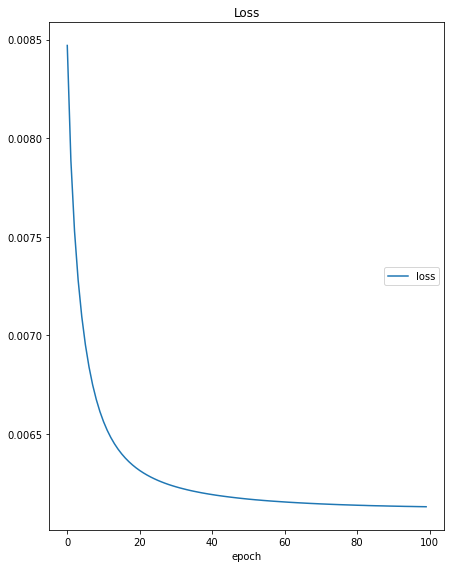

In [6]:
x_history = np.load('x_history_9_25_33.npy')
groups = {'loss': ['loss']}

outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)
print('Performed linear regression on cadata. Training time: ' + str(time.time()-start))
# Print losses after each epoch
initial_loss = Z.calculate_LINREG_loss(np.zeros(Z.num_features))
print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_LINREG_loss(x_history[:,e])
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()

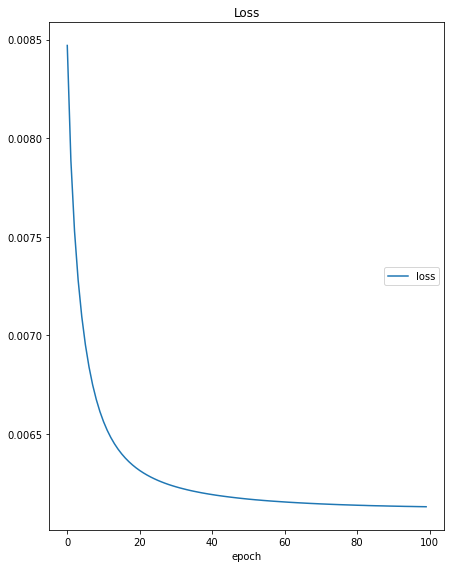

In [3]:
groups = {'loss': ['loss']}

outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)
print('Performed linear regression on cadata. Training time: ' + str(time.time()-start))
# Print losses after each epoch
initial_loss = Z.calculate_LINREG_loss(np.zeros(Z.num_features))
print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_LINREG_loss(x_history[:,e])
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()